In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect



In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

/Users/kylethomasmataloni/opt/anaconda3/lib/python3.8/site-packages/sqlalchemy/ext/declarative/clsregistry.py:125: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  util.warn(
/Users/kylethomasmataloni/opt/anaconda3/lib/python3.8/site-packages/sqlalchemy/ext/declarative/clsregistry.py:125: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  util.warn(


In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [16]:
# Calculate the date one year from the last date in data set.
query_1 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_1)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_1).\
    order_by(measurement.date).all()
#results

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_results_df = pd.DataFrame(prcp_results, columns = ["Date", "Precipitation"])
prcp_results_df.set_index("Date", inplace=True)
prcp_results_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<AxesSubplot:title={'center':'Precipitation Analysis'}, xlabel='Date'>

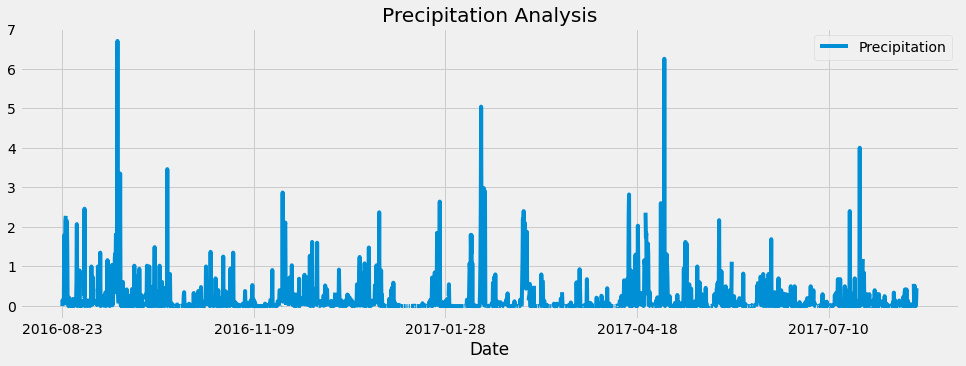

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_results_df.plot(title="Precipitation Analysis",
                     figsize=(15,5))
                     

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()

9

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
#session.query(func.max(measurement.station)).first()

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#inspector = inspect(engine)
#inspector.get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [26]:
sel = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

station_stats = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
station_stats
       

[(54.0, 85.0, 71.66378066378067)]

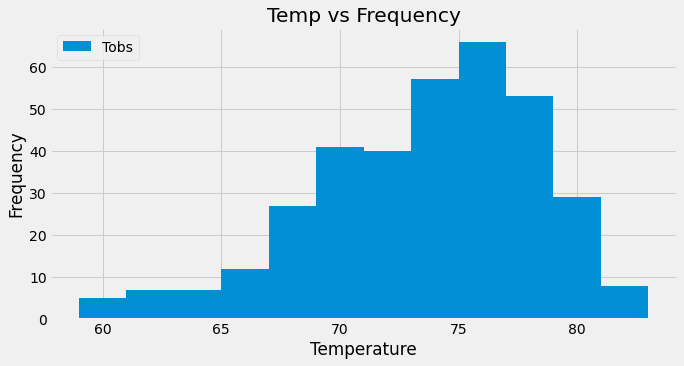

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.tobs).\
    filter(measurement.date >= query_1).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

tempDF = pd.DataFrame(temp, columns=["Tobs"])
tempDF.plot.hist(bins=12, title="Temp vs Frequency", figsize=(10,5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.show()

# Close session

In [35]:
# Close Session
session.close()

Climate App

In [ ]:
from flask import Flask, jsonify

In [ ]:
app = Flask(__name__)

#route to home page
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "Welcome to my Home page!"

In [ ]:
#List all available api routes.
@app.route("/welcome")
def welcome():
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    
    session = Session(engine)
    
    results = session.query(measurement.date, measurement.prcp).all()
    
    precipitation_data = []
    
    for date, prcp in results:
        precipitation_dict = {}
        precipitation_dict["date"] = date
        precipitation_dict["prcp"] = precipitation
        precipitation_data.append(precipitation_dict)
    
    return jsonify(precipitation_data)

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    
    session = Session(engine)
    
    results = session.query(station.name).all()
    
    stations_data = list(np.ravel(results))
    
    return jsonify (stations_data)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    
    session = Session(engine)
    
    #most recent data
    query_1 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
   
    #data from last 12 months
    prcp_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_1).\
    order_by(measurement.date).all()
    
    last_twelve = list(np.ravel(prcp_results))
    
    return jsonify(last_twelve)

In [ ]:
@app.route("/<start>")
def start_day(start): 
    start_day = session.query(measurement.date, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
        filter(measurement.date>=start).\
        group_by(measurement.date).all()
        
        start_day_data = list(np.ravel(start_day))
        
        return jsonify(start_day_data)

In [ ]:
@app.route("/<start>/<end>")
def start_day(start, end): 
    start_end_day = session.query(measurement.date, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
        filter(measurement.date>=start).\
        filter(measurement.date<=end).\
        group_by(measurement.date).all()
        
        start_end_day_data = list(np.ravel(start_end_day))
        
        return jsonify(start__end_day_data)

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)